### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

- **自变量**：文字条件是否一致
- **因变量**：参与者朗读所花费的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

- **Null Hypothesis**: 无论文字条件是否一致，参与者朗读同等大小列表的墨色名称所花费的总体平均时间（population mean）相同
- **Alternative Hypothesis**: 当文字与打印颜色不一致时，参与者朗读同等大小列表的墨色名称所花费的总体平均时间更多

- 以数学符号说明，即$H_0: \mu_0-\mu_1\ge0$ 和 $H_1: \mu_0-\mu_1<0$。其中$\mu_0$为文字条件一致时，朗读所花费的总体平均时间；$\mu_1$为文字条件不一致时，朗读所花费的总体平均时间。

- 根据以下三个条件，此处使用paired one-sided t-test with different variance进行统计检验
    - 研究目标为两个样本平均值的差异是否具有统计显著性；总体标准差未知且样本数小于30 --> t-test
        - 对于t-test的使用，根据实验采样的描述和之后的分析可以得知实验满足t-test的assumption
            - 具有二元自变量
            - 两组因变量样本皆呈正态分布
            - 样本标准差可以用于估计总体标准差
            - 两组因变量样本的标准差相近
    - 两次采样是改变测试条件后，对同一组参与者进行的 --> paired
    - 根据Stroop Effect的描述，当文字条件不一致时，参与者花费的时间更多  --> one-sided

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [8]:
import pandas as pd

df = pd.read_csv("stroopdata.csv")
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**从描述性统计的结果来看**
- 花费时间的样本均值（sample mean）
    - 文字条件一致时，$\bar{y_0}=14.05$
    - 文字条件不一致时，$\bar{y_1}=22.02$
    - 差值$\bar{d}=\bar{y_0}-\bar{y_1}=-7.96$
- 花费时间的样本标准差（sample standard variance）
    - 文字条件一致时，$s_0=3.56$
    - 文字条件不一致时，$s_1=4.80$
- 花费时间的样本中位数（sample median）
    - 文字条件一致时，$median_0 = 14.36$，距离对应样本均值$\frac{\bar{y_0}-median_0}{s_0}=-0.09$个标准差，集中趋势明显
    - 文字条件不一致时，$median_1 = 21.02$，距离对应样本均值$\frac{\bar{y_1}-median_1}{s_1}=0.21$个标准差，集中趋势明显

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

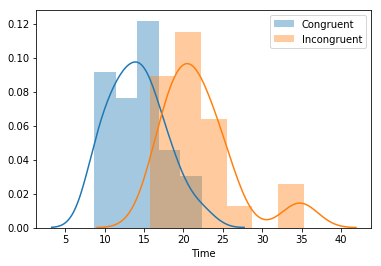

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution Plot
sns.distplot(df.iloc[:,0], label='Congruent')
sns.distplot(df.iloc[:,1],  axlabel='Time', label='Incongruent' )
plt.legend()

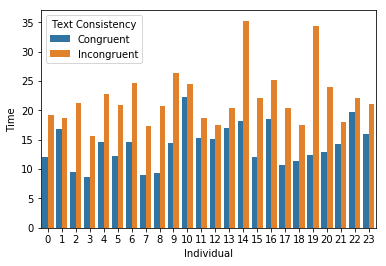

In [10]:
# Individual Response Comparison
df['Individual'] = df.index
df_unpivot = pd.melt(df, id_vars = ['Individual'], value_vars =['Congruent','Incongruent'],
                    var_name='Text Consistency', value_name='Time')
sns.barplot(x="Individual", y="Time", hue="Text Consistency", data=df_unpivot)

**从可视化结果来看**
- 两组样本集中趋势明显，与描述性分析结果一致
- 从整体分布来看，文本不一致时，参与者花费时间的更长
- 从同一参与者的两次反馈来看，文本不一致时，花费时间皆长于文本一致的测试

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [11]:
from scipy import stats

paired_ttest = stats.ttest_rel(df.Congruent, df.Incongruent)
print (paired_ttest)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


In [12]:
# Transform two-sided t-test result to one-sided

p_one_sided = paired_ttest.pvalue/2
print (p_one_sided)

2.05150029286e-08


**从paried t-test的结果来看**
- `t-statistic`的值小于0，说明文字条件一致的样本均值小于文字条件不一致的样本均值，与可视化结果相同
- 若将置信水平设为5%, 则因`p_one_sided`的值远小于5%，故reject Null Hypothesis
- 结果与stroop effect的描述一致，即当文字条件不一致时，当文字与打印颜色不一致时，参与者朗读同等大小列表的墨色名称所花费的总体平均时间更多

Reference:
1. [T-Score vs. Z-Score: What’s the Difference?](http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/)
2. [Assumptions for the t-test](http://www.csic.cornell.edu/Elrod/t-test/t-test-assumptions.html)
3. [Udacity Intro to Inferential Statistics: Assumption of T-test](https://classroom.udacity.com/courses/ud201/lessons/1330208559/concepts/2329210700923)
4. [Stackoverflow: Create clustered bar chart across two columns in bokeh
](https://stackoverflow.com/questions/41822200/create-clustered-bar-chart-across-two-columns-in-bokeh)
5. [Stackoverflow: How to perform two-sample one-tailed t-test with numpy/scipy](https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy)
6. [Khanacademy: One-tailed and two-tailed tests](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/one-tailed-and-two-tailed-tests)